# Urgências e morbilidade hospitalar
Projeto para a unidade curricular Programação para a Ciência de Dados
Feito por: André Santos Nº123579 e Joana Carvalho Nº123577

## Importar as bibliotecas necessárias

In [1]:
import pandas as pd # manipulação de dados
import numpy as np # numeros e arrays
import matplotlib.pyplot as plt # visualização de dados

from sklearn.model_selection import train_test_split # divisão de dados em treino e teste
from sklearn.linear_model import LinearRegression # regressão linear
from sklearn.ensemble import RandomForestRegressor # regressão com floresta aleatória
from sklearn.ensemble import RandomForestClassifier # classificação com floresta aleatória
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix # métricas de avaliação

import seaborn as sns # visualização de dados
 
# mostrar gráficos no notebook
%matplotlib inline

## Exportar os datesets necessários para o projeto
Os nossos datasets foram descarregados através do Portal da Transparência do Serviço Nacional de Saúde (https://transparencia.sns.gov.pt/pages/home-page/) e estão localizados na pasta "datasets".
Começamos por ler os ficheiros csv e transformá-los em dataframes através da biblioteca Pandas para podermos manipular dados.

In [2]:
# exportar os dados de urgências e morbilidade através dos seus ficheiros CSV
urgencias = pd.read_csv('datasets/atendimentos-por-urgencia.csv', sep=';', encoding="utf-8")
morbilidade = pd.read_csv('datasets/morbilidade.csv', sep=';', encoding="utf-8")

print("Dados de Urgências:")
urgencias.info()

print("\nDados de Morbilidade:")
morbilidade.info()

print("Estatisticas Descritivas de Urgências:")
display(urgencias.describe())

print("\nEstatisticas Descritivas de Morbilidade:")
display(morbilidade.describe())

Dados de Urgências:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Período                 5841 non-null   object 
 1   Período.Format.2        5841 non-null   object 
 2   Região                  5841 non-null   object 
 3   Instituição             5841 non-null   object 
 4   Localização Geográfica  5841 non-null   object 
 5   Urgências Geral         5840 non-null   float64
 6   Urgências Pediátricas   5111 non-null   float64
 7   Urgência Obstetricia    4964 non-null   float64
 8   Urgência Psiquiátrica   440 non-null    float64
 9   Total Urgências         5840 non-null   float64
dtypes: float64(5), object(5)
memory usage: 456.5+ KB

Dados de Morbilidade:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480554 entries, 0 to 480553
Data columns (total 11 columns):
 #   Column                                    No

,Urgências Geral,Urgências Pediátricas,Urgência Obstetricia,Urgência Psiquiátrica,Total Urgências
count,5840.000000,5111.000000,4964.000000,440.000000,5840.000000
mean,58453.263014,19025.387008,5784.785254,1196.631818,80110.959075
std,41716.860962,14936.701478,4899.294143,1997.568234,58703.816226
min,0.000000,0.000000,53.000000,0.000000,0.000000
25%,25716.500000,7561.000000,1898.750000,0.000000,34724.750000
50%,49684.000000,15106.000000,4360.000000,0.000000,66589.000000
75%,81574.250000,26936.000000,8417.500000,1703.250000,112798.750000
max,292003.000000,84352.000000,30278.000000,7450.000000,380759.000000



Estatisticas Descritivas de Morbilidade:


,Código Capítulo Diagnóstico Principal,Internamentos,Dias de Internamento,Ambulatório,Óbitos
count,480554.000000,480554.000000,480554.000000,480554.000000,480554.000000
mean,10.835119,9.737903,81.204044,10.074849,0.662144
std,6.098661,22.032583,192.505873,42.037729,2.400307
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,0.000000,0.000000
50%,11.000000,2.000000,14.000000,1.000000,0.000000
75%,15.000000,8.000000,67.000000,4.000000,0.000000
max,22.000000,470.000000,11078.000000,1262.000000,120.000000


In [3]:
# mostrar as primeiras linhas dos dados de urgências
display(urgencias.head())

,Período,Período.Format.2,Região,Instituição,Localização Geográfica,Urgências Geral,Urgências Pediátricas,Urgência Obstetricia,Urgência Psiquiátrica,Total Urgências
0,2024-01,2024/01/01,Região de Saúde LVT,"Unidade Local de Saúde da Arrábida, EPE","38.529351, -8.881073",5433.0,2425.0,515.0,NaN,8373.0
1,2024-01,2024/01/01,Região de Saúde Norte,Unidade Local de Saúde da Póvoa de Varzim/Vila...,"41.383183, -8.758784",5536.0,NaN,NaN,NaN,5536.0
2,2024-01,2024/01/01,Região de Saúde LVT,"Unidade Local de Saúde de Amadora/Sintra, EPE","38.7436332060551, -9.0",13917.0,3268.0,1303.0,NaN,18488.0
3,2024-01,2024/01/01,Região de Saúde Norte,"Unidade Local de Saúde de Braga, EPE","41.562328338623, -8.3",11752.0,4087.0,998.0,NaN,16837.0
4,2024-01,2024/01/01,Região de Saúde Norte,"Unidade Local de Saúde de Entre Douro e Vouga,...","40.9295, -8.54567",15899.0,2720.0,630.0,NaN,19249.0


In [4]:
# mostrar as primeiras linhas dos dados de urgências
display(morbilidade.head())

,Período,Código Capítulo Diagnóstico Principal,Instituição,Regiões,Descrição Capítulo Diagnóstico Principal,Faixa Etária,Sexo,Internamentos,Dias de Internamento,Ambulatório,Óbitos
0,2019-07,1,"Unidade Local de Saúde do Oeste, E.P.E.",Região de Saúde LVT,Algumas doenças infecciosas e parasitárias,[5-15[,F,1,1,0,0
1,2019-07,1,"Unidade Local de Saúde do Tâmega e Sousa, E.P.E.",Região de Saúde do Norte,Algumas doenças infecciosas e parasitárias,[1-5[,M,3,14,0,0
2,2019-07,1,"Unidade Local de Saúde do Tâmega e Sousa, E.P.E.",Região de Saúde do Norte,Algumas doenças infecciosas e parasitárias,[45-65[,F,2,12,0,1
3,2019-07,1,"Unidade Local de Saúde do Tâmega e Sousa, E.P.E.",Região de Saúde do Norte,Algumas doenças infecciosas e parasitárias,[5-15[,F,2,7,0,0
4,2019-07,2,Hospital de Cascais Dr. José de Almeida,Região de Saúde LVT,Neoplasias,[45-65[,F,8,264,2,1


## Limpeza dos Dados
### Remover colunas desnecessárias
Começamos a etapa de modelação dos dados com a remoção de colunas que serão desnecessárias para o nosso projeto, a coluna "Período.Format.2" na dataframe das urgências apenas mostra a data num formato diferente que não é necessário para o que queremos no nosso modelo, por isso vamos removê-la.

In [5]:
urgencias = urgencias.drop(columns=['Período.Format.2']) # remover a coluna 'Período.Format.2' que não é necessária para análise
urgencias = urgencias.drop(columns=['Localização Geográfica']) # remover a coluna 'Localização Geográfica' que não é necessária para análise

# mostrar as primeiras linhas dos dados de urgências após a remoção das colunas
display(urgencias.head())

,Período,Região,Instituição,Urgências Geral,Urgências Pediátricas,Urgência Obstetricia,Urgência Psiquiátrica,Total Urgências
0,2024-01,Região de Saúde LVT,"Unidade Local de Saúde da Arrábida, EPE",5433.0,2425.0,515.0,NaN,8373.0
1,2024-01,Região de Saúde Norte,Unidade Local de Saúde da Póvoa de Varzim/Vila...,5536.0,NaN,NaN,NaN,5536.0
2,2024-01,Região de Saúde LVT,"Unidade Local de Saúde de Amadora/Sintra, EPE",13917.0,3268.0,1303.0,NaN,18488.0
3,2024-01,Região de Saúde Norte,"Unidade Local de Saúde de Braga, EPE",11752.0,4087.0,998.0,NaN,16837.0
4,2024-01,Região de Saúde Norte,"Unidade Local de Saúde de Entre Douro e Vouga,...",15899.0,2720.0,630.0,NaN,19249.0


### Renomear colunas
De seguida, mudamos o nome das colunas para estarem todas sem acentos e em letra pequena.

In [6]:
# renomear as colunas para facilitar a análise
morbilidade = morbilidade.rename(columns={
    'Período': 'periodo',
    'Regiões': 'regiao',
    'Código Capítulo Diagnóstico Principal': 'codigo_diagnostico',
    'Descrição Capítulo Diagnóstico Principal': 'diagnostico',
    'Faixa Etária': 'faixa_etaria',
    'Sexo': 'sexo',
    'Internamentos': 'internamentos',
    'Instituição': 'instituicao',
    'Dias de Internamento': 'dias_internamento',
    'Ambulatório': 'ambulatorio',
    'Óbitos': 'obitos',
})

urgencias = urgencias.rename(columns={
    'Período': 'periodo',
    'Região': 'regiao',
    'Instituição': 'instituicao',
    'Urgências Geral': 'urgencias_gerais',
    'Urgências Pediátricas': 'urgencias_pediatricas',
    'Urgência Obstetricia': 'urgencias_obstetricas',
    'Urgência Psiquiátrica': 'urgencias_psiquiatricas',
    'Total Urgências': 'total_urgencias'
})

### Preencher valores em falta
Como foi possivel ver nos passos anteriores, existem valores em falta para as colunas das "Urgências Geral", "Urgências Pediátricas", "Urgência Obstetricia", "Urgência Psiquiátrica" e "Total Urgências", por isso vamos preencher todos estes valores em falta com 0 para depois podermos converter estas colunas do tipo float para o tipo integer (algo que não seria possivel fazer com valores em falta em algumas linhas)

In [7]:
# preencher valores ausentes com 0
urgencias.fillna(0, inplace=True)

### Trocar tipos de dados
Precisamos agora de trocar alguns tipos de dados em algumas colunas, ambas as colunas de "Período" precisam ser alteradas para um formato datetime, e as colunas "Urgências Geral", "Urgências Pediátricas", "Urgência Obstetricia", "Urgência Psiquiátrica" e "Total Urgências" precisam ser alteradas para integer.

In [8]:
# converter colunas de período para datetime
urgencias['periodo'] = pd.to_datetime(urgencias['periodo'])
morbilidade['periodo'] = pd.to_datetime(morbilidade['periodo'])

# converter colunas de números para inteiros
urgencias['urgencias_gerais'] = urgencias['urgencias_gerais'].astype(int)
urgencias['urgencias_pediatricas'] = urgencias['urgencias_pediatricas'].astype(int)
urgencias['urgencias_obstetricas'] = urgencias['urgencias_obstetricas'].astype(int)
urgencias['urgencias_psiquiatricas'] = urgencias['urgencias_psiquiatricas'].astype(int)
urgencias['total_urgencias'] = urgencias['total_urgencias'].astype(int)

print("Tipos de dados em urgências:")
print(urgencias.dtypes)
print("\nTipos de dados em morbilidade:")
print(morbilidade.dtypes)

Tipos de dados em urgências:
periodo                    datetime64[ns]
regiao                             object
instituicao                        object
urgencias_gerais                    int64
urgencias_pediatricas               int64
urgencias_obstetricas               int64
urgencias_psiquiatricas             int64
total_urgencias                     int64
dtype: object

Tipos de dados em morbilidade:
periodo               datetime64[ns]
codigo_diagnostico             int64
instituicao                   object
regiao                        object
diagnostico                   object
faixa_etaria                  object
sexo                          object
internamentos                  int64
dias_internamento              int64
ambulatorio                    int64
obitos                         int64
dtype: object


### Remover letras e caracteres desnecessárias
Podemos reparar que a coluna da faixa etária tem parentesis retos desnecessários, então começamos por os remover. De seguida, iremos também remover a indicação do modelo de gestão de cada hospital pois não faz sentido para o nosso estudo e irá permitir uma melhor padronização dos dados mais tarde.

In [9]:
# remover parentesis retos da coluna faixa_etaria
morbilidade['faixa_etaria'] = morbilidade['faixa_etaria'].str.replace('[', '')
morbilidade['faixa_etaria'] = morbilidade['faixa_etaria'].str.replace(']', '')

# remover indicação do modelo de gestão da instituição
morbilidade['instituicao'] = morbilidade['instituicao'].str.split(',').str[0]
urgencias['instituicao'] = urgencias['instituicao'].str.split(',').str[0]

# remover a palavra "do" da coluna regiao
morbilidade['regiao'] = morbilidade['regiao'].str.replace(' do ', ' ', regex=False)
urgencias['regiao'] = urgencias['regiao'].str.replace(' do ', ' ', regex=False)

# mostrar as primeiras linhas dos dados de urgências e morbilidade após as alterações
print("\nDados de Urgências após alterações:")
display(urgencias.head())
print("\nDados de Morbilidade após alterações:")
display(morbilidade.head())


Dados de Urgências após alterações:


,periodo,regiao,instituicao,urgencias_gerais,urgencias_pediatricas,urgencias_obstetricas,urgencias_psiquiatricas,total_urgencias
0,2024-01-01,Região de Saúde LVT,Unidade Local de Saúde da Arrábida,5433,2425,515,0,8373
1,2024-01-01,Região de Saúde Norte,Unidade Local de Saúde da Póvoa de Varzim/Vila...,5536,0,0,0,5536
2,2024-01-01,Região de Saúde LVT,Unidade Local de Saúde de Amadora/Sintra,13917,3268,1303,0,18488
3,2024-01-01,Região de Saúde Norte,Unidade Local de Saúde de Braga,11752,4087,998,0,16837
4,2024-01-01,Região de Saúde Norte,Unidade Local de Saúde de Entre Douro e Vouga,15899,2720,630,0,19249



Dados de Morbilidade após alterações:


,periodo,codigo_diagnostico,instituicao,regiao,diagnostico,faixa_etaria,sexo,internamentos,dias_internamento,ambulatorio,obitos
0,2019-07-01,1,Unidade Local de Saúde do Oeste,Região de Saúde LVT,Algumas doenças infecciosas e parasitárias,5-15,F,1,1,0,0
1,2019-07-01,1,Unidade Local de Saúde do Tâmega e Sousa,Região de Saúde Norte,Algumas doenças infecciosas e parasitárias,1-5,M,3,14,0,0
2,2019-07-01,1,Unidade Local de Saúde do Tâmega e Sousa,Região de Saúde Norte,Algumas doenças infecciosas e parasitárias,45-65,F,2,12,0,1
3,2019-07-01,1,Unidade Local de Saúde do Tâmega e Sousa,Região de Saúde Norte,Algumas doenças infecciosas e parasitárias,5-15,F,2,7,0,0
4,2019-07-01,2,Hospital de Cascais Dr. José de Almeida,Região de Saúde LVT,Neoplasias,45-65,F,8,264,2,1


### Remover todos os dados antes de 2019
O dataset da morbilidade apenas tem dados para os anos a partir de 2019 então vamos apagar todos os dados até 2019 do dataset das urgencias

In [21]:
urgencias = urgencias[urgencias['periodo'] >= '2019-01-01']

urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 0 to 5840
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   periodo                  2960 non-null   datetime64[ns]
 1   regiao                   2960 non-null   object        
 2   instituicao              2960 non-null   object        
 3   urgencias_gerais         2960 non-null   int64         
 4   urgencias_pediatricas    2960 non-null   int64         
 5   urgencias_obstetricas    2960 non-null   int64         
 6   urgencias_psiquiatricas  2960 non-null   int64         
 7   total_urgencias          2960 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 208.1+ KB


### Remover instituições e trabalhar apenas com a região
Como os nomes das instituições variam muito entre os dois datasets, decidimos descartar as instituições e fazer apenas o estudo baseado na região em que cada instituição se localiza.

In [33]:
# Confirmar as regiões únicas nas urgências e na morbilidade
print("regioes únicas em urgências:")
print(urgencias['regiao'].unique())
print("\nregioes únicas em morbilidade:")
print(morbilidade['regiao'].unique())

morbilidade_ano_regiao = morbilidade.groupby(["periodo", "regiao"]).agg({"obitos": "sum", "internamentos": "sum", "dias_internamento": "sum", "ambulatorio": "sum"})
urgencias_ano_regiao = urgencias.groupby(["periodo", "regiao"]).agg({"total_urgencias": "sum", "urgencias_gerais": "sum", "urgencias_pediatricas": "sum", "urgencias_obstetricas": "sum", "urgencias_psiquiatricas": "sum"})

df_modelo = pd.merge(urgencias_ano_regiao, morbilidade_ano_regiao, on=["periodo", "regiao"])

display(df_modelo.head(15))

regioes únicas em urgências:
['Região de Saúde LVT' 'Região de Saúde Norte' 'Região de Saúde Centro'
 'Região de Saúde Alentejo' 'Região de Saúde Algarve']

regioes únicas em morbilidade:
['Região de Saúde LVT' 'Região de Saúde Norte' 'Região de Saúde Centro'
 'Região de Saúde Algarve' 'Região de Saúde Alentejo']


total_urgencias  urgencias_gerais  \
periodo    regiao                                                        
2019-01-01 Região de Saúde Alentejo            34008             28888   
           Região de Saúde Algarve             30132             21191   
           Região de Saúde Centro             102208             71458   
           Região de Saúde LVT                210891            135017   
           Região de Saúde Norte              188744            142473   
2019-02-01 Região de Saúde Alentejo            64996             55226   
           Região de Saúde Algarve             57994             41004   
           Região de Saúde Centro             190745            135277   
           Região de Saúde LVT                397192            254047   
           Região de Saúde Norte              369901            278447   
2019-03-01 Região de Saúde Alentejo            94816             80925   
           Região de Saúde Algarve             87183             62053   
           Região de Saúde Centro             283059            202761   
           Região de Saúde LVT                593726            383895   
           Região de Saúde Norte              551005            418406   

                                     urgencias_pediatricas  \
periodo    regiao                                            
2019-01-01 Região de Saúde Alentejo                   4697   
           Região de Saúde Algarve                    7204   
           Região de Saúde Centro                    24723   
           Região de Saúde LVT                       60207   
           Região de Saúde Norte                     35392   
2019-02-01 Região de Saúde Alentejo                   8998   
           Região de Saúde Algarve                   13735   
           Região de Saúde Centro                    44275   
           Região de Saúde LVT                      113369   
           Região de Saúde Norte                     71148   
2019-03-01 Região de Saúde Alentejo                  12784   
           Região de Saúde Algarve                   20138   
           Região de Saúde Centro                    63587   
           Região de Saúde LVT                      164039   
           Região de Saúde Norte                    101861   

                                     urgencias_obstetricas  \
periodo    regiao                                            
2019-01-01 Região de Saúde Alentejo                    423   
           Região de Saúde Algarve                    1737   
           Região de Saúde Centro                     6027   
           Região de Saúde LVT                       15177   
           Região de Saúde Norte                     10879   
2019-02-01 Região de Saúde Alentejo                    772   
           Região de Saúde Algarve                    3255   
           Região de Saúde Centro                    11193   
           Região de Saúde LVT                       28790   
           Região de Saúde Norte                     20306   
2019-03-01 Região de Saúde Alentejo                   1107   
           Região de Saúde Algarve                    4992   
           Região de Saúde Centro                    16711   
           Região de Saúde LVT                       44234   
           Região de Saúde Norte                     30738   

                                     urgencias_psiquiatricas  obitos  \
periodo    regiao                                                      
2019-01-01 Região de Saúde Alentejo                        0     288   
           Região de Saúde Algarve                         0     289   
           Região de Saúde Centro                          0    1109   
           Região de Saúde LVT                           490    2213   
           Região de Saúde Norte                           0    1774   
2019-02-01 Região de Saúde Alentejo                        0     249   
           Região de Saúde Algarve                         0     251   
           Região de

### Entender os dados depois da limpeza
Depois de termos concluido a limpeza dos nossos dados, vamos tentar entende-los para começarmos a fazer a preparação dos modelo de previsão.

In [ ]:
print("Total urgências por região:")
print(df_modelo.groupby('regiao')['total_urgencias'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências gerais por região:")
print(df_modelo.groupby('regiao')['urgencias_gerais'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências pediátricas por região:")
print(df_modelo.groupby('regiao')['urgencias_pediatricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências obstétricas por região:")
print(df_modelo.groupby('regiao')['urgencias_obstetricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências psiquiátricas por região:")
print(df_modelo.groupby('regiao')['urgencias_psiquiatricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal internamentos por região:")
print(df_modelo.groupby('regiao')['internamentos'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal de óbitos por região:")
print(df_modelo.groupby('regiao')['obitos'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['total_urgencias'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências gerais por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_gerais'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências pediátricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_pediatricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências obstétricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_obstetricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urgências psiquiátricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_psiquiatricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal internamentos por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['internamentos'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal óbitos por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['obitos'].sum().apply(lambda x: f"{x:,.0f}"))


Total urgências por região:
regiao
Região de Saúde Norte       79,774,391
Região de Saúde LVT         78,732,973
Região de Saúde Centro      39,843,349
Região de Saúde Algarve     13,182,348
Região de Saúde Alentejo    13,058,678
Name: total_urgencias, dtype: object

Total urgências gerais por região:
regiao
Região de Saúde Norte       62,621,529
Região de Saúde LVT         52,549,612
Região de Saúde Centro      29,216,628
Região de Saúde Alentejo    11,276,951
Região de Saúde Algarve      9,943,070
Name: urgencias_gerais, dtype: object

Total urgências pediátricas por região:
regiao
Região de Saúde LVT         19,799,776
Região de Saúde Norte       12,633,885
Região de Saúde Centro       8,122,600
Região de Saúde Algarve      2,502,469
Região de Saúde Alentejo     1,558,346
Name: urgencias_pediatricas, dtype: object

Total urgências obstétricas por região:
regiao
Região de Saúde LVT         6,140,259
Região de Saúde Norte       4,518,977
Região de Saúde Centro      2,495,214
Região de

periodo
2019    51,458
2020    54,199
2021    57,092
2022    54,795
2023    51,232
2024    43,167
2025     4,607
Name: obitos, dtype: object

Podemos perceber que existe mais urgências, internamentos e óbitos na região de Lisboa e Vale do Tejo (LVT) e na região do Norte, o que faz sentido visto que são as zonas com mais população.

## Modelação
### Prever o número de óbitos baseado no número de internamentos
#### Selecionar o modelo adequado
Começamos por experimentar a utilizar uma regressão linear para prever o número de óbitos baseado no número de internamentos

Coeficiente (a): 0.06090784317569831
Intercepto (b): 89.78902839850105
Erro médio absoluto (MAE): 112.12722260565494
Erro médio quadrático (MSE): 43168.43488795623
Raiz do erro médio quadrático (RMSE): 207.77014917440914
R²: 0.8831730045390914


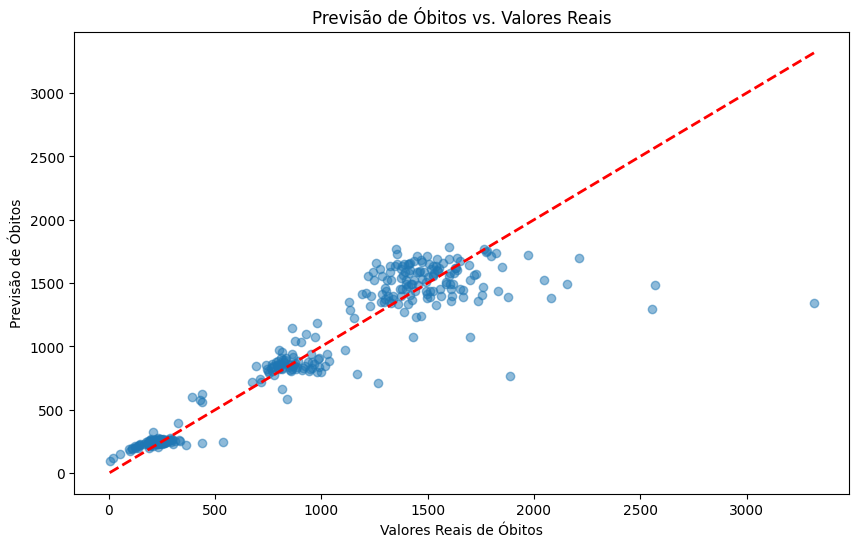

In [14]:
# definir features e target
X = df_modelo[["internamentos"]]
y = df_modelo["obitos"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de regressão linear
lr_model = LinearRegression()
lr_model.fit(X, y)
print("Coeficiente (a):", lr_model.coef_[0])
print("Intercepto (b):", lr_model.intercept_)

# fazer previsões
y_pred = lr_model.predict(X)

# avaliar o modelo
print("Erro médio absoluto (MAE):", mean_absolute_error(y, y_pred))
print("Erro médio quadrático (MSE):", mean_squared_error(y, y_pred))
print("Raiz do erro médio quadrático (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))

# mostrar o modelo
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title('Previsão de Óbitos vs. Valores Reais')
plt.xlabel('Valores Reais de Óbitos')
plt.ylabel('Previsão de Óbitos')
plt.show()

Como podemos ver através da avaliação do modelo, o score R² está bastante alto (0.88), portanto vamos utilizar este modelo.

#### Previsão de óbitos para 2025
Vamos tentar através do nosso modelo prever a quantidade de óbitos para o ano de 2025, para isso, vamos utilizar os valores do ano anterior (2024), e utilizar uma variavel "increase" para multiplicar o numero de internamentos nos dados ficticios de 2025

In [15]:
# recolher apenas os dados de 2024
df_2024 = df_modelo[df_modelo.index.get_level_values('periodo').year == 2024]
increase = 1.15  # +15%

data_2025 = (df_2024[["internamentos"]].sum() * increase).round()

print(f"\nTotal de internamentos para 2025 (aumento de 15%): {int(data_2025["internamentos"]):,}")
df_2025 = pd.DataFrame([data_2025.round()])

# Fazer a previsão para 2025
predict_2025 = lr_model.predict(df_2025)
print(f"\nPrevisão de óbitos para o ano de 2025: {int(predict_2025[0]):,}")


Total de internamentos para 2025 (aumento de 15%): 803,648

Previsão de óbitos para o ano de 2025: 49,038


### Que tipo de urgência tem maior impacto nos internamentos hospitalares?
Prever internamentos com base nos vários tipos de urgências (pergunta de regressão)
#### Selecionar o modelo adequado

Erro médio absoluto: 3078.8233783783785
Erro médio quadrático: 25348073.727985132
Raiz do erro médio quadrático: 5034.687053629563
R² do modelo: 0.7225377726165858


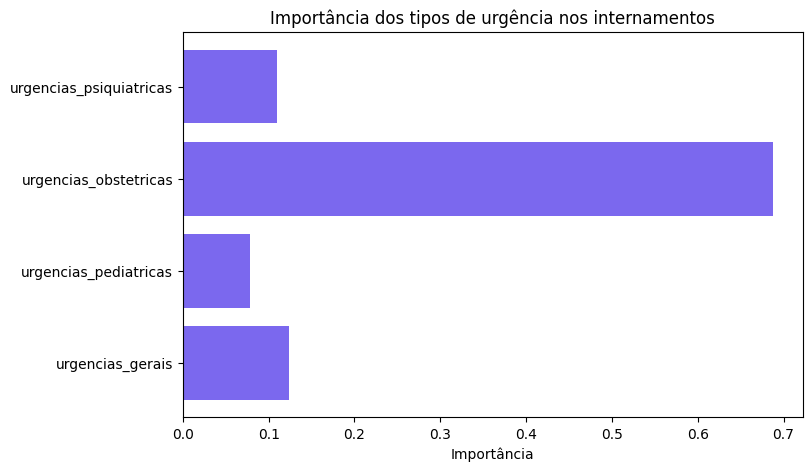

In [16]:
# definir features e target
X = df_modelo[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas"
]]
y = df_modelo["internamentos"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# fazer previsões
y_pred = rf_model.predict(X_test)

# avaliar o modelo
print("Erro médio absoluto:", mean_absolute_error(y_test, y_pred))
print("Erro médio quadrático:", mean_squared_error(y_test, y_pred))
print("Raiz do erro médio quadrático:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² do modelo:", r2_score(y_test, y_pred))

# importância das variáveis
importancias = rf_model.feature_importances_
labels = X.columns

# plotar o gráfico de importância
plt.figure(figsize=(8, 5))
plt.barh(labels, importancias, color="mediumslateblue")
plt.title("Importância dos tipos de urgência nos internamentos")
plt.xlabel("Importância")
plt.show()

Podemos ver que a variavel que teve mais impacto nas decisões das random forests foi as Urgências Obstetricas

In [17]:
df_2024 = df_modelo[df_modelo.index.get_level_values('periodo').year == 2024]
increase = 1.15  # +15%

data_2025 = (df_2024[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas"
]] * increase).round()

# Fazer a previsão
predict_2025 = rf_model.predict(data_2025)

print(f"\nPrevisão de internamentos para 2025: {int(predict_2025.sum()):,}")


Previsão de internamentos para 2025: 747,310


### Prever se uma determinada região tem pressão hospitalar alta
Com base nos dados que temos, conseguimos prever se uma região estará sob alta pressão hospitalar?
Definimos pressão hospitalar através da média de internamentos + dias de internamento.
#### Selecionar o modelo adequado

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.94      0.91      0.93        34

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



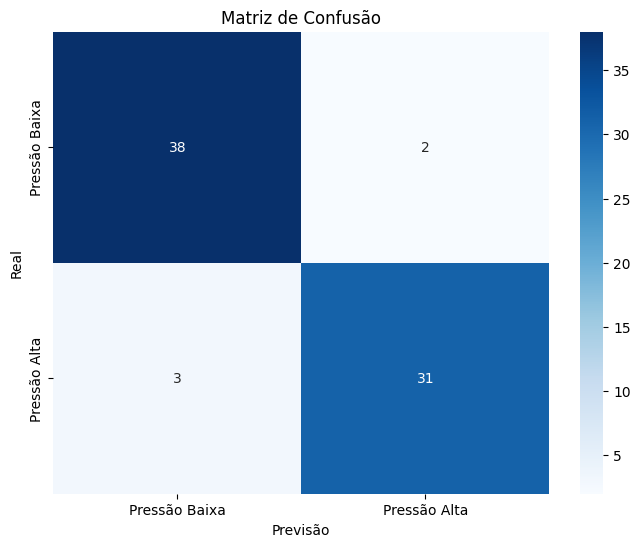

In [35]:
# criar coluna da soma
df_modelo["pressao_total"] = df_modelo["internamentos"] + df_modelo["dias_internamento"]

# calcular a média
avg = df_modelo["pressao_total"].mean()

# criar coluna binária
df_modelo["pressao_alta"] = (df_modelo["pressao_total"] > avg).astype(int)

# definir features e target para classificação
X = df_modelo[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas",
    "ambulatorio",
    "obitos"
]]
y = df_modelo["pressao_alta"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de random forest para classificação
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)

# fazer previsões
y_pred = rfc_model.predict(X_test)

# avaliar o modelo de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# mostrar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Pressão Baixa', 'Pressão Alta'], yticklabels=['Pressão Baixa', 'Pressão Alta'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

In [36]:
# 1. Obter dados de 2024
df_2024 = df_modelo[df_modelo.index.get_level_values("periodo").year == 2024].copy()

# 2. Aumentar os valores em 10%
df_2025_input = df_2024[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas",
    "ambulatorio",
    "obitos"
]] * 1.10  # simular aumento

# 3. Fazer a previsão
previsoes_2025 = rfc_model.predict(df_2025_input)

# 4. Juntar com nomes de regiões
df_resultado_2025 = df_2024.copy()
df_resultado_2025["pressao_prevista"] = previsoes_2025

# Reset index to access 'regiao' as a column
df_resumo = df_resultado_2025.reset_index()[["periodo", "regiao", "pressao_prevista"]]

df_resumo["pressao_prevista"] = df_resumo["pressao_prevista"].map({
    1: "🔴 Pressão hospitalar alta",
    0: "🟢 Pressão hospitalar normal"
})

print("Previsão de pressão hospitalar por região para 2025:")

display(df_resumo)

Previsão de pressão hospitalar por região para 2025:


,periodo,regiao,pressao_prevista
0,2024-01-01,Região de Saúde Alentejo,🟢 Pressão hospitalar normal
1,2024-01-01,Região de Saúde Algarve,🟢 Pressão hospitalar normal
2,2024-01-01,Região de Saúde Centro,🔴 Pressão hospitalar alta
3,2024-01-01,Região de Saúde LVT,🔴 Pressão hospitalar alta
4,2024-01-01,Região de Saúde Norte,🔴 Pressão hospitalar alta
5,2024-02-01,Região de Saúde Alentejo,🟢 Pressão hospitalar normal
6,2024-02-01,Região de Saúde Algarve,🟢 Pressão hospitalar normal
7,2024-02-01,Região de Saúde Centro,🔴 Pressão hospitalar alta
8,2024-02-01,Região de Saúde LVT,🔴 Pressão hospitalar alta
9,2024-02-01,Região de Saúde Norte,🔴 Pressão hospitalar alta
